In [2]:
# importer les packages 
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import seaborn as sns
import numpy as np



In [ ]:
df=pd.read_csv(r'C:\Users\HP\Desktop\cours 2idsd\gust trainning\projet\Diabètes_complications\diabete.csv')
df

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
#Observation units for variables with a minimum value of zero are NaN, except for the pregnancy variable.
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,79.00000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,38.70000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,21.80000,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [6]:
# NaN values of 0 for Glucose, Blood Pressure, Skin Thickness, Insulin, BMI
# We can write Nan instead of 0
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    df[col].replace(0,np.NaN,inplace=True)

In [7]:
# now we can see missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
# We can fill in NaN values with a median according to the target
for col in df.columns:
    df.loc[(df["Outcome"]==0) & (df[col].isnull()),col] = df[df["Outcome"]==0][col].median()
    df.loc[(df["Outcome"]==1) & (df[col].isnull()),col] = df[df["Outcome"]==1][col].median()

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# Création d'une fonction pour définir la nouvelle classe en fonction de la valeur de 'Outcome' et 'Glucose'
def get_new_glucose_class(outcome, glucose):
    if outcome == 1:
        return 'diabétique'
    elif glucose <= 139:
        return 'Normal'
    elif glucose <= 200:
        return 'Prediabetes'
    else:
        return 'Unknown'
        
# Application de la fonction pour créer la nouvelle colonne 'New_Glucose_Class'
df['New_Glucose_Class'] = df.apply(lambda x: get_new_glucose_class(x['Outcome'], x['Glucose']), axis=1)


In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,diabétique
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,diabétique
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,diabétique
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Normal
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,Normal
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Normal
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1,diabétique


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['New_Glucose_Class'] = le.fit_transform(df['New_Glucose_Class'])


In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,2
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,2
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,2
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1,2


In [14]:
# Supprimer la colonne "Outcome"
df.drop("Outcome", axis=1, inplace=True)

In [15]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,New_Glucose_Class
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,2
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,2
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,2
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,2


# Modeling

# KNN

In [16]:
X = df.drop('New_Glucose_Class', axis=1)
y = df['New_Glucose_Class']


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [20]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.85      0.84        85
           1       0.20      0.07      0.11        14
           2       0.69      0.78      0.74        55

    accuracy                           0.75       154
   macro avg       0.57      0.57      0.56       154
weighted avg       0.72      0.75      0.73       154



# RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Séparation des features (X) et du label (y)
X = df.drop('New_Glucose_Class', axis=1)
y = df['New_Glucose_Class']

# Séparation des données en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)

# Création du modèle
rf = RandomForestClassifier(n_estimators=100, random_state=32)

# Entraînement du modèle
rf.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = rf.predict(X_test)

# Affichage de la matrice de confusion et du rapport de classification
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))
print("\nScore d'accuracy : ", accuracy_score(y_test, y_pred))


Matrice de confusion :
 [[45  0  2]
 [ 0  3  2]
 [ 3  1 21]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.75      0.60      0.67         5
           2       0.84      0.84      0.84        25

    accuracy                           0.90        77
   macro avg       0.84      0.80      0.82        77
weighted avg       0.89      0.90      0.89        77


Score d'accuracy :  0.8961038961038961


In [22]:
#save model
#enregistrer le modéle
import pickle
pickle.dump(rf, open("model_rf.pkl", "wb"))

# SVM

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import svm

# Séparation des données en entrée (X) et en sortie (y)
X = df.drop('New_Glucose_Class', axis=1)
y = df['New_Glucose_Class']

# Division des données en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)


In [24]:
# Instanciation du modèle SVM
model = svm.SVC(kernel='linear')

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)


SVC(kernel='linear')

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Instancier le classifieur SVM
svc = SVC()

# Entraîner le modèle sur les données d'entraînement
svc.fit(X_train, y_train)

# Prédire les classes sur les données de test
y_pred = svc.predict(X_test)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

           0       0.99      0.88      0.93        90
           1       0.50      0.22      0.31         9
           2       0.74      0.95      0.83        55

    accuracy                           0.86       154
   macro avg       0.74      0.68      0.69       154
weighted avg       0.87      0.86      0.86       154



# Naive Bayes

Accuracy: 74.03%


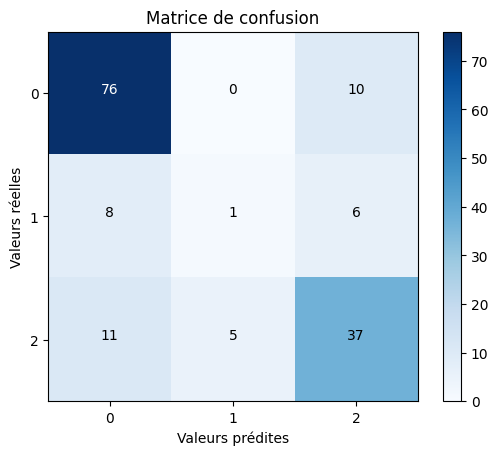

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        86
           1       0.17      0.07      0.10        15
           2       0.70      0.70      0.70        53

    accuracy                           0.74       154
   macro avg       0.55      0.55      0.54       154
weighted avg       0.70      0.74      0.72       154



In [26]:
from sklearn.naive_bayes import MultinomialNB

# Séparation des données en entrée (X) et en sortie (y)
y = df['New_Glucose_Class']
X = df.drop('New_Glucose_Class', axis=1)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Création de l'objet de modèle de classification Naive Bayes
nb_classifier = MultinomialNB()

# Entraînement du modèle de classification Naive Bayes
nb_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = nb_classifier.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

# Calcul de la matrice de confusion
confusion_mtx = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()
tick_marks = np.arange(len(range(confusion_mtx.shape[0])))
plt.xticks(tick_marks, range(confusion_mtx.shape[0]))
plt.yticks(tick_marks, range(confusion_mtx.shape[1]))
thresh = confusion_mtx.max() / 2.
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        plt.text(j, i, format(confusion_mtx[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_mtx[i, j] > thresh else "black")
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.show()

# Affichage du classification report
print(classification_report(y_test, y_pred))


# Gradient Boosting

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Séparation des données en entrée (X) et en sortie (y)
y = df['New_Glucose_Class']
X = df.drop(['New_Glucose_Class'], axis=1)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Création du modèle Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, random_state= 42)

# Entrainement du modèle sur l'ensemble d'entraînement
gb.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=2, random_state=42)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

# Prédiction sur l'ensemble de test
y_pred = gb.predict(X_test)

# Affichage de la matrice de confusion
print(confusion_matrix(y_test, y_pred))

# Affichage du rapport de classification
print(classification_report(y_test, y_pred))


[[77  0  8]
 [ 0  9  5]
 [ 6  4 45]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        85
           1       0.69      0.64      0.67        14
           2       0.78      0.82      0.80        55

    accuracy                           0.85       154
   macro avg       0.80      0.79      0.79       154
weighted avg       0.85      0.85      0.85       154



# ANN

In [30]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Séparation des données en entrée (X) et en sortie (y)
y = df.iloc[:, -1].values
X = df.iloc[:, :-1].values


# Encodage des variables catégorielles en variables binaires
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
y = onehotencoder.fit_transform(y.reshape(-1,1)).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Création du modèle
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X.shape[1]))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrainement du modèle
model.fit(X, y, epochs=500, batch_size=32)

# Evaluation du modèle sur les données d'entrainement
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Epoch 1/500
24/24 [==============================] - 1s 2ms/step - loss: 2.7598 - accuracy: 0.5182
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 0.9612 - accuracy: 0.6758
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 0.7745 - accuracy: 0.7227
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 0.7155 - accuracy: 0.7292
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 0.7538 - accuracy: 0.7174
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.7526
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.7708
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.7578
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 0.7107 - accuracy: 0.7409
Epoch 10/500
24/24 [==============================] - 0s 2ms/step - loss: 0.9131 - accuracy: 0.6797
Epoch 11/

5/5 [==============================] - 0s 1ms/step


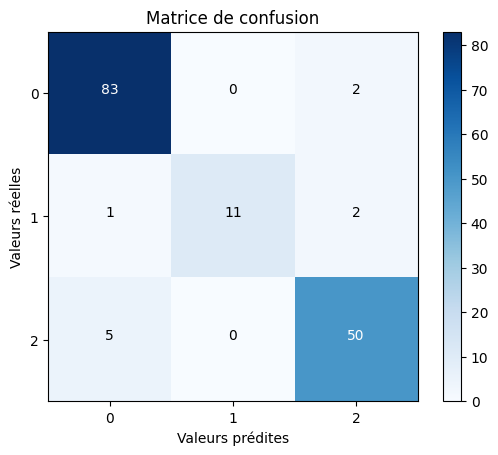

5/5 [==============================] - 0s 3ms/step - loss: 0.1152 - accuracy: 0.9351

accuracy: 93.51%


In [31]:
from sklearn.metrics import confusion_matrix

# Prédiction sur les données de test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calcul de la matrice de confusion
confusion_mtx = confusion_matrix(y_test_classes, y_pred_classes)

# Affichage de la matrice de confusion
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()
tick_marks = np.arange(len(range(confusion_mtx.shape[0])))
plt.xticks(tick_marks, range(confusion_mtx.shape[0]))
plt.yticks(tick_marks, range(confusion_mtx.shape[1]))
thresh = confusion_mtx.max() / 2.
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        plt.text(j, i, format(confusion_mtx[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_mtx[i, j] > thresh else "black")
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.show()

scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


5/5 [==============================] - 0s 3ms/step


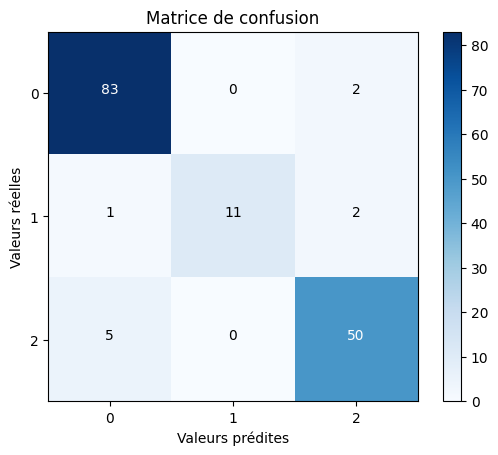

Rapport de classification : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        85
           1       1.00      0.79      0.88        14
           2       0.93      0.91      0.92        55

    accuracy                           0.94       154
   macro avg       0.95      0.89      0.92       154
weighted avg       0.94      0.94      0.93       154

5/5 [==============================] - 0s 3ms/step - loss: 0.1152 - accuracy: 0.9351

accuracy: 93.51%


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# Prédiction sur les données de test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calcul de la matrice de confusion
confusion_mtx = confusion_matrix(y_test_classes, y_pred_classes)

# Affichage de la matrice de confusion
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()
tick_marks = np.arange(len(range(confusion_mtx.shape[0])))
plt.xticks(tick_marks, range(confusion_mtx.shape[0]))
plt.yticks(tick_marks, range(confusion_mtx.shape[1]))
thresh = confusion_mtx.max() / 2.
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        plt.text(j, i, format(confusion_mtx[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_mtx[i, j] > thresh else "black")
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.show()

# Affichage du rapport de classification
report = classification_report(y_test_classes, y_pred_classes)
print("Rapport de classification : \n", report)

# Affichage de l'exactitude
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


In [33]:
#prediction
var=np.array([1	,155.0	,66.0	,15.0	,140.0	,23.2	,0.487	,22])
var=var.reshape(1,-1)
prediction = model.predict(var)
print("la prédiction est ", np.argmax(prediction, axis=-1))
if np.isin(0, np.argmax(prediction, axis=-1)):
    print("Vous êtes normal.")
elif np.isin(1, np.argmax(prediction, axis=-1)):
    print("Vous êtes prédiabétique.")
else:
    print("Vous êtes diabétique.")

1/1 [==============================] - 0s 33ms/step
la prédiction est  [2]
Vous êtes diabétique.


In [34]:
#prediction
var=np.array([1	,146.0	,56.0	,27.0	,102.5	,29.7	,0.564	,29])
var=var.reshape(1,-1)
prediction = model.predict(var)
print("la prédiction est ", np.argmax(prediction, axis=-1))
if np.isin(0, np.argmax(prediction, axis=-1)):
    print("Vous êtes normal.")
elif np.isin(1, np.argmax(prediction, axis=-1)):
    print("Vous êtes prédiabétique.")
else:
    print("Vous êtes diabétique.")

1/1 [==============================] - 0s 40ms/step
la prédiction est  [1]
Vous êtes prédiabétique.


In [35]:
#prediction
var=np.array([10	,125.0	,70.0	,26.0	,115.0	,31.1	,0.205	,41])
var=var.reshape(1,-1)
prediction = model.predict(var)
print("la prédiction est ", np.argmax(prediction, axis=-1))

int(np.argmax(prediction, axis=-1))

if np.isin(0, np.argmax(prediction, axis=-1)):
    print("Vous êtes normal.")
elif np.isin(1, np.argmax(prediction, axis=-1)):
    print("Vous êtes prédiabétique.")
else:
    print("Vous êtes diabétique.")

1/1 [==============================] - 0s 30ms/step
la prédiction est  [0]
Vous êtes normal.


In [36]:
model.save('modele_diabète_finaleeee.h5')